In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import random

random.seed(10)
print(random.random())

0.5714025946899135


In [ ]:
adata = sc.read_10x_h5(filename="2_464/output-XETG00045__0021464__2__20240612__152143/cell_feature_matrix.h5")

In [ ]:
adata

AnnData object with n_obs × n_vars = 55062 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
adata.var

,gene_ids,feature_types,genome
2010300C02Rik,ENSMUSG00000026090,Gene Expression,Unknown
Acsbg1,ENSMUSG00000032281,Gene Expression,Unknown
Acta2,ENSMUSG00000035783,Gene Expression,Unknown
Acvrl1,ENSMUSG00000000530,Gene Expression,Unknown
Adamts2,ENSMUSG00000036545,Gene Expression,Unknown
...,...,...,...
Zfp366,ENSMUSG00000050919,Gene Expression,Unknown
Zfp536,ENSMUSG00000043456,Gene Expression,Unknown
Zfpm2,ENSMUSG00000022306,Gene Expression,Unknown
Zic1,ENSMUSG00000032368,Gene Expression,Unknown


In [ ]:
df = pd.read_csv("2_464/output-XETG00045__0021464__2__20240612__152143/cells.csv.gz")

In [ ]:
df

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
0,aaaapaon-1,2322.825684,233.058182,74,0,0,0,0,74,60.419065,42.311408
1,aaaapmeg-1,2324.388184,240.443604,58,0,0,0,0,58,63.580002,48.588127
2,aaaboemk-1,2317.033203,238.701218,74,0,0,0,0,74,57.529065,41.227658
3,aaacmbpb-1,2308.765625,234.199936,42,0,0,0,0,42,102.414379,40.730939
4,aaadaphc-1,2313.683594,257.991547,114,0,0,0,0,114,139.803755,55.090627
...,...,...,...,...,...,...,...,...,...,...,...
55057,ojdbbfej-1,1963.864258,1666.963257,69,0,0,0,0,69,67.779534,40.730939
55058,ojdbkjbb-1,1957.640747,1672.304810,46,0,0,0,0,46,34.950939,25.152032
55059,ojddlcll-1,1954.338013,1666.845947,116,0,0,0,0,116,87.332191,61.773752
55060,ojdefmfc-1,1954.912476,1655.287109,48,0,0,0,0,48,45.743283,37.795783


In [ ]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [ ]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
aaaapaon-1,aaaapaon-1,2322.825684,233.058182,74,0,0,0,0,74,60.419065,42.311408
aaaapmeg-1,aaaapmeg-1,2324.388184,240.443604,58,0,0,0,0,58,63.580002,48.588127
aaaboemk-1,aaaboemk-1,2317.033203,238.701218,74,0,0,0,0,74,57.529065,41.227658
aaacmbpb-1,aaacmbpb-1,2308.765625,234.199936,42,0,0,0,0,42,102.414379,40.730939
aaadaphc-1,aaadaphc-1,2313.683594,257.991547,114,0,0,0,0,114,139.803755,55.090627
...,...,...,...,...,...,...,...,...,...,...,...
ojdbbfej-1,ojdbbfej-1,1963.864258,1666.963257,69,0,0,0,0,69,67.779534,40.730939
ojdbkjbb-1,ojdbkjbb-1,1957.640747,1672.304810,46,0,0,0,0,46,34.950939,25.152032
ojddlcll-1,ojddlcll-1,1954.338013,1666.845947,116,0,0,0,0,116,87.332191,61.773752
ojdefmfc-1,ojdefmfc-1,1954.912476,1655.287109,48,0,0,0,0,48,45.743283,37.795783


In [ ]:
prefix = "8_5_region2_"
adata.obs['cell_id'] = prefix + adata.obs['cell_id']

In [ ]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [ ]:
adata.obsm

AxisArrays with keys: spatial

In [ ]:
table=adata.obs.copy()

In [ ]:
table['region'] = 2
table['EmbryonicDay_8_5'] = 8.5
table['cell_id_duplicate'] = '8_5_region2_' + table['cell_id']
#adata.obs=table

In [ ]:
adata.obs=table

adata.obs

In [ ]:
### Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20,30,40), inplace=True)

In [ ]:
### calculate and print the percentage of control probes
cprobes = (adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative DNA probe count % : {cprobes}")

Negative DNA probe count % : 0.013229532169063146


In [ ]:
### calculate and print the percentage of control codewords
cwords = (adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative decoding count % : {cwords}")

Negative decoding count % : 0.012844205989381694


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

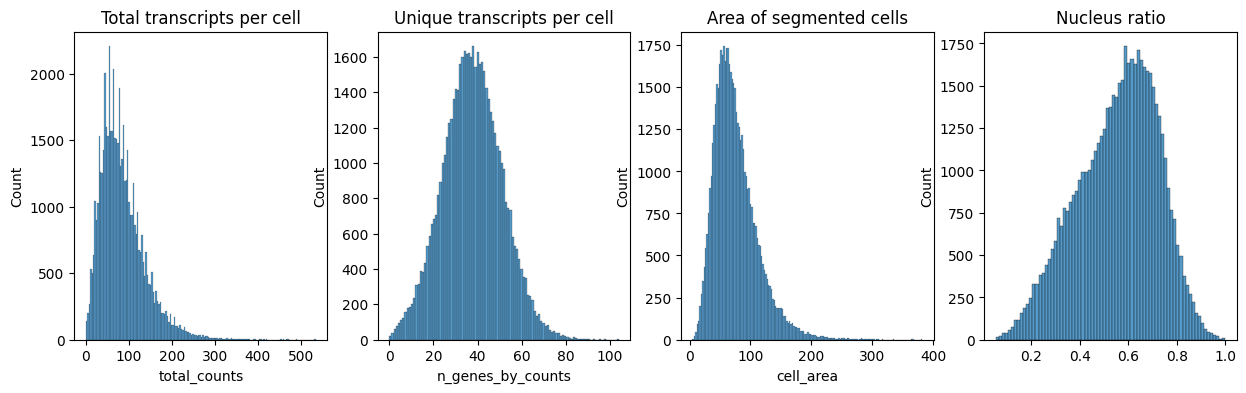

In [ ]:
### plot the distribution of:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1])

axs[2].set_title("Area of segmented cells")
sns.histplot(adata.obs["cell_area"], kde=False, ax=axs[2])

axs[3].set_title("Nucleus ratio")
sns.histplot(adata.obs["nucleus_area"] / adata.obs["cell_area"], kde=False, ax=axs[3])

In [ ]:
adata

AnnData object with n_obs × n_vars = 55062 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

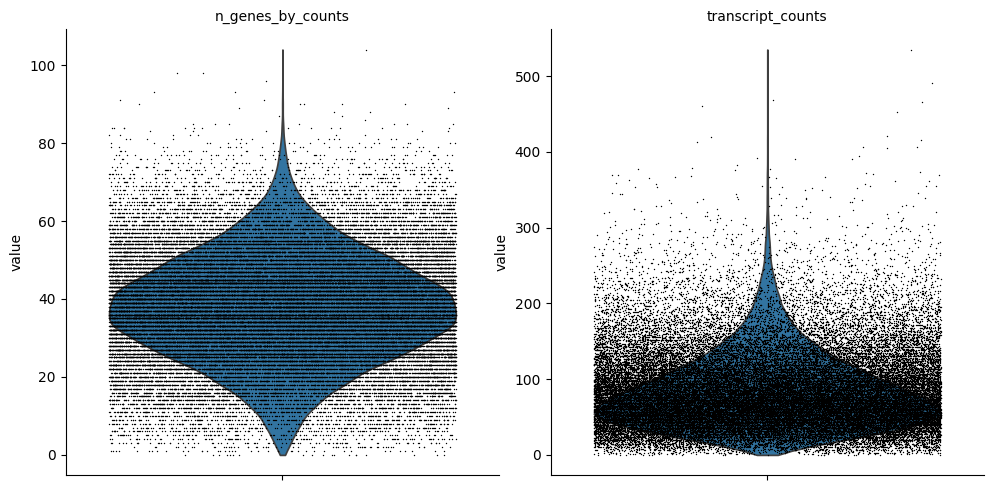

In [ ]:
# Visualize the number of genes and transcripts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'transcript_counts'], jitter=0.4, multi_panel=True)

In [ ]:
# Subset the data
adata = adata[(adata.obs['n_genes_by_counts'] > 20) & (adata.obs['n_genes_by_counts'] < 100) &
            (adata.obs['transcript_counts'] > 20) & (adata.obs['transcript_counts'] < 470), :]

In [ ]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,region,EmbryonicDay_8_5,cell_id_duplicate,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes
aaaapaon-1,8_5_region2_aaaapaon-1,2322.825684,233.058182,74,0,0,0,0,74.0,60.419065,...,2,8.5,8_5_region2_8_5_region2_aaaapaon-1,37,3.637586,4.317488,55.405405,77.027027,90.540541,100.000000
aaaapmeg-1,8_5_region2_aaaapmeg-1,2324.388184,240.443604,58,0,0,0,0,58.0,63.580002,...,2,8.5,8_5_region2_8_5_region2_aaaapmeg-1,32,3.496508,4.077538,62.068966,79.310345,96.551724,100.000000
aaaboemk-1,8_5_region2_aaaboemk-1,2317.033203,238.701218,74,0,0,0,0,74.0,57.529065,...,2,8.5,8_5_region2_8_5_region2_aaaboemk-1,35,3.583519,4.317488,50.000000,79.729730,93.243243,100.000000
aaacmbpb-1,8_5_region2_aaacmbpb-1,2308.765625,234.199936,42,0,0,0,0,42.0,102.414379,...,2,8.5,8_5_region2_8_5_region2_aaacmbpb-1,23,3.178054,3.761200,66.666667,92.857143,100.000000,100.000000
aaadaphc-1,8_5_region2_aaadaphc-1,2313.683594,257.991547,114,0,0,0,0,114.0,139.803755,...,2,8.5,8_5_region2_8_5_region2_aaadaphc-1,39,3.688879,4.744932,51.754386,77.192982,92.105263,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ojdbbfej-1,8_5_region2_ojdbbfej-1,1963.864258,1666.963257,69,0,0,0,0,69.0,67.779534,...,2,8.5,8_5_region2_8_5_region2_ojdbbfej-1,36,3.610918,4.248495,59.420290,76.811594,91.304348,100.000000
ojdbkjbb-1,8_5_region2_ojdbkjbb-1,1957.640747,1672.304810,46,0,0,0,0,46.0,34.950939,...,2,8.5,8_5_region2_8_5_region2_ojdbkjbb-1,32,3.496508,3.850148,52.173913,73.913043,95.652174,100.000000
ojddlcll-1,8_5_region2_ojddlcll-1,1954.338013,1666.845947,116,0,0,0,0,116.0,87.332191,...,2,8.5,8_5_region2_8_5_region2_ojddlcll-1,54,4.007333,4.762174,50.000000,68.965517,79.310345,87.931034
ojdefmfc-1,8_5_region2_ojdefmfc-1,1954.912476,1655.287109,48,0,0,0,0,48.0,45.743283,...,2,8.5,8_5_region2_8_5_region2_ojdefmfc-1,27,3.332205,3.891820,62.500000,85.416667,100.000000,100.000000


In [ ]:
adata.write_h5ad('/home/julia/Xenioum/h5ad/2_464_working_qc.h5ad')

In [ ]:
adata.raw = adata

In [ ]:
## standard scanpy workflow
sc.pp.normalize_total(adata, inplace=True) # Normalize counts per cell
sc.pp.log1p(adata) # Logarithmize

# sc.pp.highly_variable_genes (adata) # 313 genes

sc.pp.pca(adata) # do principal component analysis
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30) # compute a neighborhood graph
sc.tl.umap(adata) # embed the neighborhood graph of the data
sc.tl.leiden(adata, resolution=6.5) # cluster the cells into subgroups

/tmp/ipykernel_3203776/864768455.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=6.5) # cluster the cells into subgroups


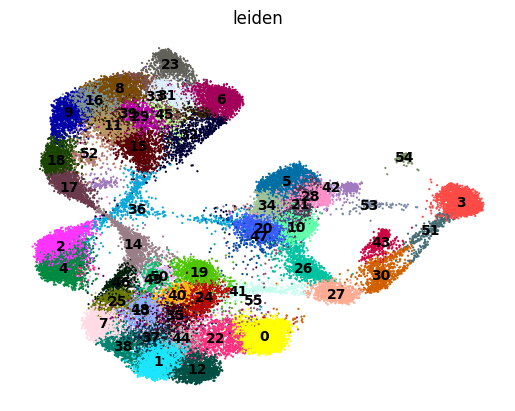

In [ ]:
sc.pl.umap(adata, color=['leiden'],
           size=10, frameon=False,  color_map='magma', legend_loc='on data', save='2_464.pdf')


In [ ]:
adata

AnnData object with n_obs × n_vars = 49303 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata.write_h5ad('/home/julia/Xenioum/h5ad/2_464_working_umap.h5ad')

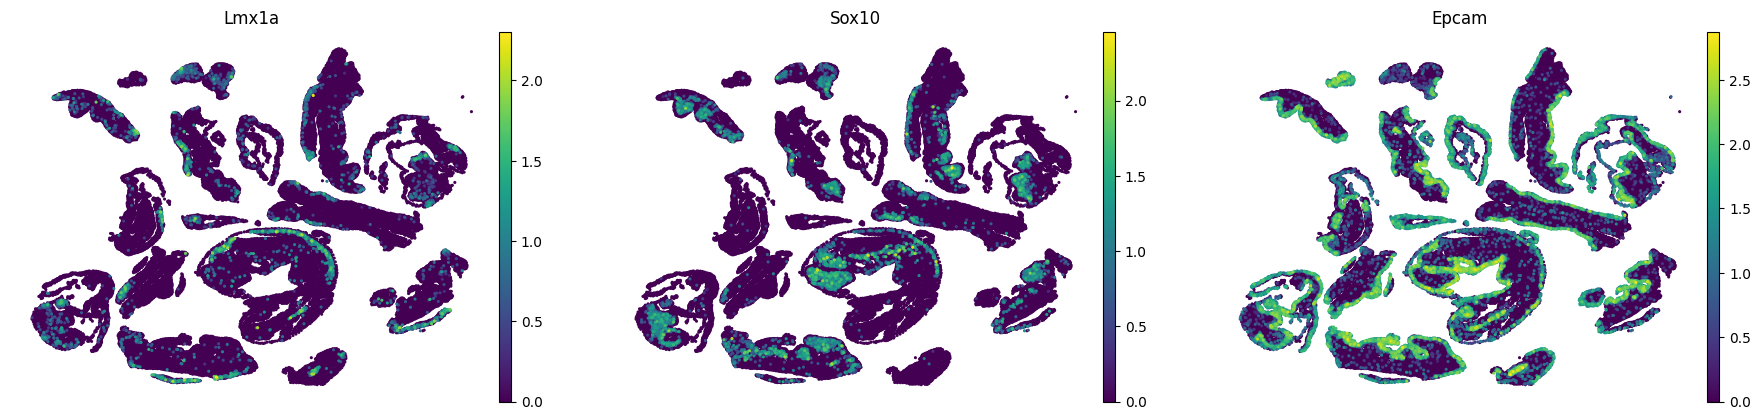

In [ ]:
adata.obsm["X_spatial"] = adata.obsm["spatial"].copy()
sc.pl.embedding(adata, basis="X_spatial", color=['Lmx1a', 'Sox10', 'Epcam'], frameon=False, s=20)

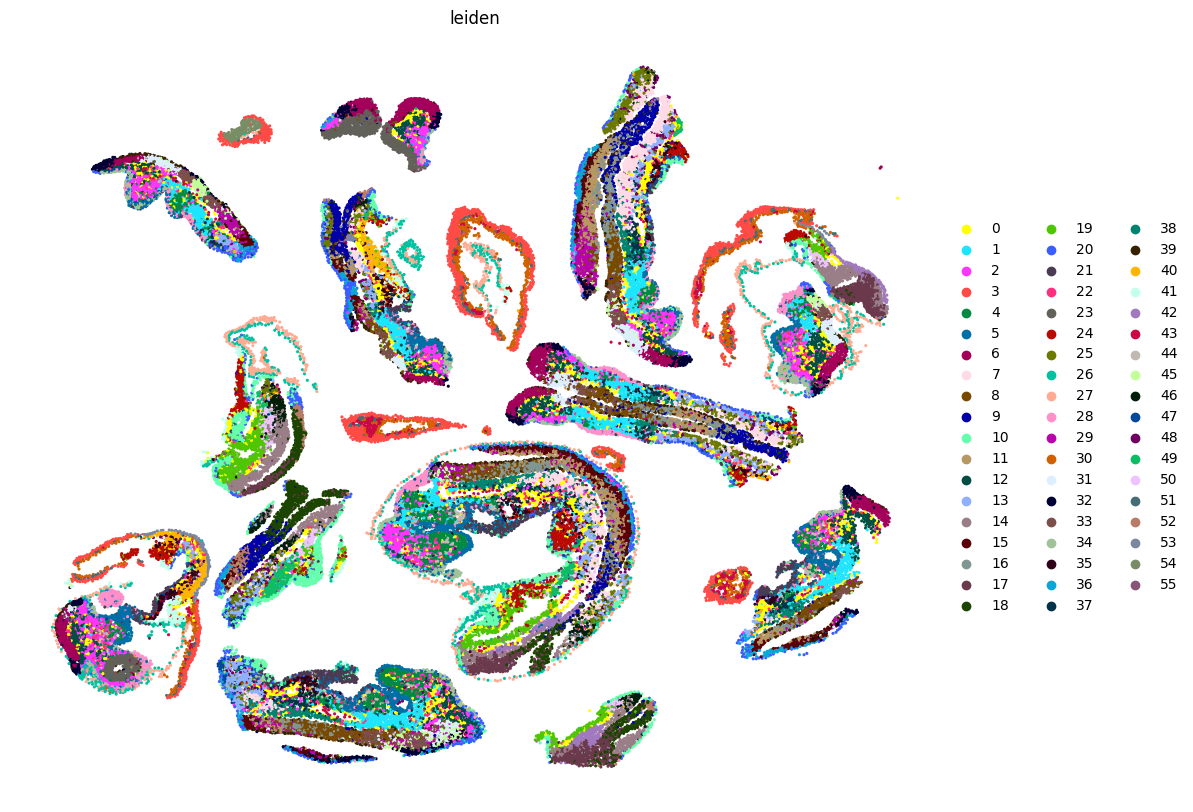

In [ ]:
plt.rcParams['figure.figsize'] = [12, 10]  # width, height in inches
# Plot the spatial embedding for cluster 5
sc.pl.embedding(adata, basis='X_spatial', color='leiden', size=20, frameon=False)

In [ ]:
adata.write_h5ad('/home/julia/Xenioum/h5ad/2_464_working_umap.h5ad')